In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, TensorBoard
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_squared_error 

In [29]:
data = pd.read_csv('all_data_results_cleaned.csv')

In [30]:
to_drop=["pipe_dn","pipe_schedule","flange_class",
        "hot_spot_stress", "max_deformation", "support_right", "support_left", "ratio"]
to_keep=["outside_diameter", "wall_thickness", "raised_face_depth",
        "w_neck_c", "flange_outer_radius", "flange_thickness_d","raised_face_radius",
        "length1", "length2", "lumped_mass", "frequency", "x_deformation_position",
        "y_deformation_position", "z_deformation_position", "support", "allowable_deformation"]

data.drop(columns=to_drop,inplace=True)

In [31]:
numeric_features = ["outside_diameter", "wall_thickness", "raised_face_depth" ,'length1', 'length2', 'lumped_mass',
                    "w_neck_c", "flange_outer_radius", "flange_thickness_d","raised_face_radius"]
categorical_features = ['support']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop=None), categorical_features)
    ])

In [32]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [33]:
output_columns = ['allowable_deformation', 'frequency', 'x_deformation_position', 'y_deformation_position', 'z_deformation_position']
x = data.drop(output_columns, axis=1)
y = pd.DataFrame(data[output_columns])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [35]:
x_train_transformed = pipeline.fit_transform(x_train)
x_test_transformed = pipeline.transform(x_test)

In [36]:
scaler_y_frequency = StandardScaler()
scaler_y_allowable_deformation = StandardScaler()

#y_train_transformed_frequency = scaler_y_frequency.fit_transform(pd.DataFrame(y_train["frequency"]))
#y_test_transformed_frequency = scaler_y_frequency.transform(pd.DataFrame(y_test["frequency"]))

y_train_transformed_allowable_deformation = scaler_y_allowable_deformation.fit_transform(pd.DataFrame(y_train["allowable_deformation"]))
y_test_transformed_allowable_deformation = scaler_y_allowable_deformation.transform(pd.DataFrame(y_test["allowable_deformation"]))
"""
y_train_transformed_x_displacement = scaler_y.fit_transform(pd.DataFrame(y_train["x_deformation_position"]))
y_test_transformed_x_displacement = scaler_y.transform(pd.DataFrame(y_test["x_deformation_position"]))

y_train_transformed_y_displacement = scaler_y.fit_transform(pd.DataFrame(y_train["y_deformation_position"]))
y_test_transformed_y_displacement = scaler_y.transform(pd.DataFrame(y_test["y_deformation_position"]))

y_train_transformed_z_displacement = scaler_y.fit_transform(pd.DataFrame(y_train["z_deformation_position"]))
y_test_transformed_z_displacement = scaler_y.transform(pd.DataFrame(y_test["z_deformation_position"]))
"""

'\ny_train_transformed_x_displacement = scaler_y.fit_transform(pd.DataFrame(y_train["x_deformation_position"]))\ny_test_transformed_x_displacement = scaler_y.transform(pd.DataFrame(y_test["x_deformation_position"]))\n\ny_train_transformed_y_displacement = scaler_y.fit_transform(pd.DataFrame(y_train["y_deformation_position"]))\ny_test_transformed_y_displacement = scaler_y.transform(pd.DataFrame(y_test["y_deformation_position"]))\n\ny_train_transformed_z_displacement = scaler_y.fit_transform(pd.DataFrame(y_train["z_deformation_position"]))\ny_test_transformed_z_displacement = scaler_y.transform(pd.DataFrame(y_test["z_deformation_position"]))\n'

In [37]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [38]:
input_layer = Input(shape=(x_train_transformed.shape[1],))
hidden1 = Dense(512, activation='relu')(input_layer)
dropout1 = Dropout(0.2)(hidden1)
hidden2 = Dense(128, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(hidden2)
hidden3 = Dense(32, activation='relu')(dropout2)

# Separate output for each target variable
output_layer = Dense(1)(hidden3)
#, name='allowable_deformation'


In [39]:
model = Model(inputs=input_layer, outputs=output_layer)

In [40]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,505 (302.75 KB)

 Trainable params: 77,505 (302.75 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=["R2Score"])

In [42]:
history = model.fit(
    x_train_transformed, 
    y_train_transformed_allowable_deformation,  # Split the targets into separate arrays
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    verbose=1,
    callbacks=[tensorboard_callback]
)

Epoch 1/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - R2Score: 0.5658 - loss: 0.4346 - val_R2Score: 0.9217 - val_loss: 0.0769
Epoch 2/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - R2Score: 0.8999 - loss: 0.1038 - val_R2Score: 0.9201 - val_loss: 0.0785
Epoch 3/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - R2Score: 0.9164 - loss: 0.0836 - val_R2Score: 0.9322 - val_loss: 0.0666
Epoch 4/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - R2Score: 0.9166 - loss: 0.0875 - val_R2Score: 0.9556 - val_loss: 0.0436
Epoch 5/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - R2Score: 0.9367 - loss: 0.0670 - val_R2Score: 0.9218 - val_loss: 0.0768
Epoch 6/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - R2Score: 0.9416 - loss: 0.0570 - val_R2Score: 0.9598 - val_loss: 0.0394
Epoch 7/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - R2Score: 0.9298 - loss: 0.0688 - val_R2Score: 0.9503 - val_loss: 0.0488
Epoch 8/150
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - R2Score: 0.9461 - loss: 0.0529 - val_R2Score: 0.9558 - v

In [43]:
test_loss, test_mse = model.evaluate(x_test_transformed, y_test_transformed_allowable_deformation)
print('Test accuracy:', test_mse)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - R2Score: 0.9833 - loss: 0.0124
Test accuracy: 0.9819774031639099


In [44]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,517 (908.27 KB)

 Trainable params: 77,505 (302.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 155,012 (605.52 KB)

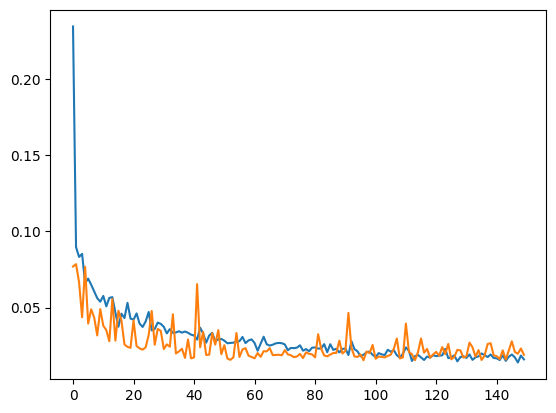

In [45]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")

In [46]:
predictions_scaled = model.predict(x_test_transformed)
predictions = scaler_y_allowable_deformation.inverse_transform((predictions_scaled))

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [47]:
predictions_df = pd.DataFrame(predictions)
print("\nSample Predictions:")
print(predictions_df)


Sample Predictions:
               0
0       2.705158
1      43.065407
2       6.961668
3       3.970062
4       6.111797
...          ...
2488    8.409411
2489    2.046321
2490   17.798323
2491   16.786442
2492  116.395065

[2493 rows x 1 columns]


In [48]:
y_test["allowable_deformation"]

3001       1.501
5829      45.212
11774      5.879
8374       2.805
8203       3.807
          ...   
11314      9.450
2055       1.185
5693       6.914
6551      21.747
5993     134.567
Name: allowable_deformation, Length: 2493, dtype: float64

In [49]:
true= y_test["allowable_deformation"].tolist()
pred= predictions_df[0].tolist()
mean_squared_error(true,pred)

102.8961179243122

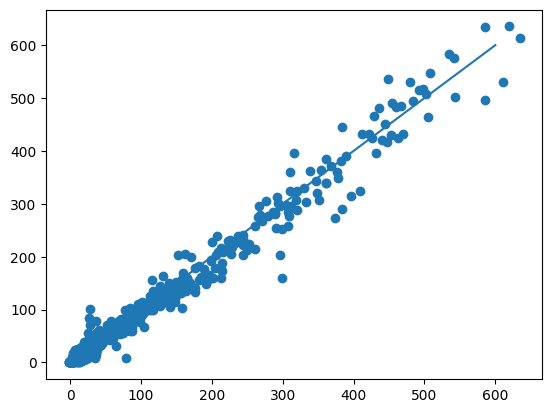

In [50]:
x=predictions_df
y=y_test["allowable_deformation"]
plt.scatter(x,y)
#plt.loglog()
plt.plot([0, 600],[0, 600])
plt.show()